## Supervised Learning
### 2.1 Classification 과 Regression
* 분류(Classification)의 특성 : 가능성 있는 여러 클래스 레이블 중 하나를 예측하는 것
* 분류의 종류
  * 두개의 클래스로 분류하는 이진 분류(binary classification)
    * 이메일 스팸 분류 - 이 이메일이 스팸인가요?
  * 셋 이상의 클래스로 분류하는 다중 분류(multiclass classification)
    * 붓꽃문제(Iris), 어떤 웹사이트의 글로부터 어떤 언어의 웹사이트의 글인지 예측
* 회귀(Regression)의 특성 : 연속적인 숫자, 부동소수점수(실수)를 예측하는 것
* 회귀의 예시
  * 어떤 사람의 교육수준, 나이, 주거지를 바탕으로 연간 소득을 예측
  * 옥수수 농장에서 전년도 수확량과 날씨, 고용 인원수 등으로 올해 수확량을 예측
* 회귀와 분류의 차이
  * 예상 출력 값 사이에 연속성이 있으면 회귀, 없으면 분류

### 2.2 일반화, 과대적합, 과소적합
* 모델이 처음보는 데이터에 대하여 정확하게 예측할 수 있으면 이를 Train세트에서 Test세트로 **일반화(generalization)** 되었다고 함
* 모델이 Train세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 이를 **과대적합(Overfitting)** 이라고 함
* 너무 간단한 모델이 선택되어서 데이터의 면면과 다양성을 잡아내지 못할 때, 이를 **과소적합(Underfitting)** 이라고 함

### 2.3 지도 학습 알고리즘
#### 2.3.1 예제에 사용할 데이터셋

In [1]:
!pip install mglearn

    100% |████████████████████████████████| 542kB 8.3MB/s eta 0:00:01
  Running setup.py bdist_wheel for mglearn ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/3b/81/34/a54d61d5d108dfcb016bcd8f4f7d8cc0538994f07704714b8d
Successfully built mglearn


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

X.shape: (26, 2)


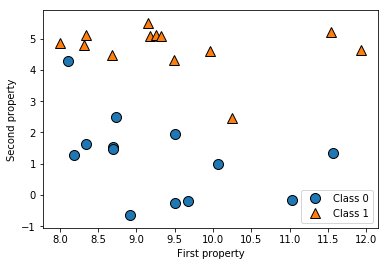

In [4]:
import mglearn
# X, y의 데이터 셋
X, y = mglearn.datasets.make_forge()
# X 모든 row의 1, 2번째 특성을 기준으로 y class의 산포도(흩뿌리듯이) 그림.
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1"],loc=4)
plt.xlabel("First property")
plt.ylabel("Second property")
print("X.shape: {}".format(X.shape))

#### 분류의 예시

Text(0,0.5,'Target')

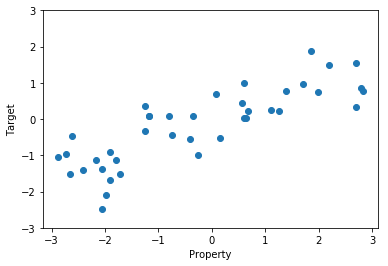

In [5]:
#40개의 X,y의 Sample 추출
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
#y의 범위를 -3~3까지 그래프에 표시
plt.ylim(-3,3)
plt.xlabel("Property")
plt.ylabel("Target")

#### scikit-learn에 들어있는 분류와 회귀 문제 예시
* 이진분류 : 위스콘신 유방암 데이터셋(Wisconsin Breast Cancer)

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


##### 유방암 데이터셋은 569개의 데이터 포인트를 가지고 있고 특성은 30개이다.

In [7]:
print("유방암의 데이터의 형태: {}".format(cancer.data.shape))

유방암의 데이터의 형태: (569, 30)


##### 569개의 데이터 포인트 중 212개는 악성이고 357개는 양성이다.

In [9]:
print("클래스별 샘플 개수:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}


##### features_names 속성을 확인하면 각 특성의 의미를 알 수 있다.

In [10]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### scikit-learn에 들어있는 분류와 회귀 문제 예시
* 회귀 : 보스택 주택가격(Boston Housing)

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))

데이터의 형태: (506, 13)


In [13]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


#### 2.3.2 K-최근접 이웃
* 가장 간단한 머신러닝 알고리즘으로, 새로운 데이터 포인트에 대해 예측할 땐, 훈련 데이터셋에서 가장 가까운 데이터 포인트(이웃)을 찾는다.

##### K-최근접 이웃 분류
* 가장 가까운 훈련 데이터 포인트 **하나**를 최근접 이웃으로 사용하였을 때

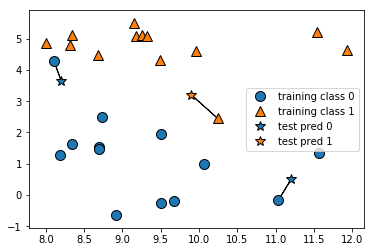

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

* 데이터포인트를 3개를 추가하면서, 가장 가까운 훈련 데이터 포인트 **3개**를 최근접 이웃으로 사용하였을 때

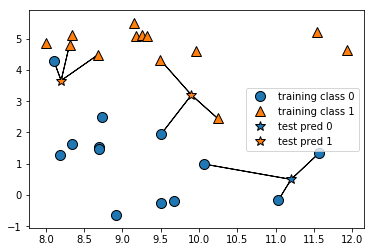

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

* 다중 분류일 때도 각 클래스에 속한 이웃이 몇 개인지를 헤아려 가장 많은 클래스를 예측값으로 사용한다.

##### scikit-learn을 사용한 K-최근접 이웃 알고리즘

In [16]:
from sklearn.model_selection import train_test_split
# X, y 전체 데이터
X, y = mglearn.datasets.make_forge()
# 전체 데이터를 train, test로 쪼갬.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

* KNeighborsClassifier를 import하고 객체를 만든다. 이 때 이웃의 수는 3으로 지정한다.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [18]:
# 분류 모델 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

* 테스트 데이터에 대하여 predict 메서드를 호출하여 예측한다.

In [19]:
print("테스트 세트 예측 : {}".format(clf.predict(X_test)))

테스트 세트 예측 : [1 0 1 0 1 0 0]


* score 메서드에 테스트 데이터와 테스트 레이블을 넣고 평가한다.

In [20]:
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.86


##### KNeighborsClassifier 분석

* 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠하면 **결정경계(decision boundary)** 를 볼 수 있다.

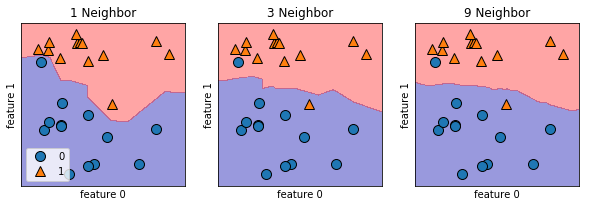

In [23]:
fig, axes = plt.subplots(1,3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax=ax)
    ax.set_title("{} Neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

* 분석결과
  * 이웃의 수를 늘릴 수록 결정 경계는 더 부드러워진다.(단순한 모델이 된다.)

##### 유방암 모델 적용

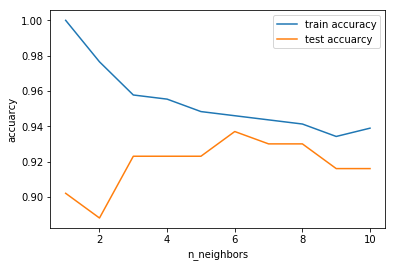

In [27]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1~10까지 n_neighbors 적용
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuarcy")
plt.ylabel("accuarcy")
plt.xlabel("n_neighbors")
plt.legend()

* 6일 때 가장 정확도가 높다.
  * 1개일 때는 모델이 너무 복잡해지고, 10개일 때는 모델이 너무 단순해진다.

##### k-최근접 이웃 회귀
* 회귀분석에도 이용가능하다.

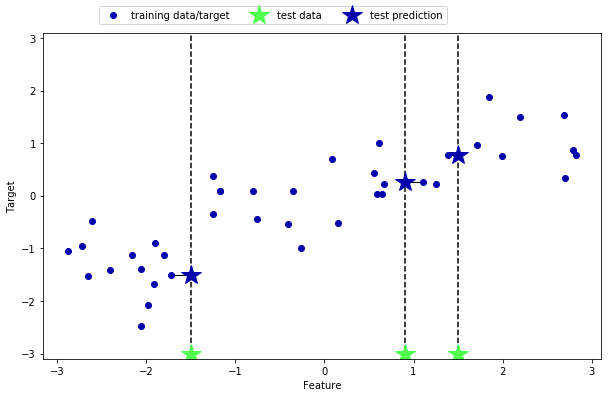

In [28]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

* 이웃의 수를 둘 이상 사용하는 것도 가능하다. 단, 여러개의 이웃을 사용할 땐, 이웃 간의 평균이 예측이 된다.

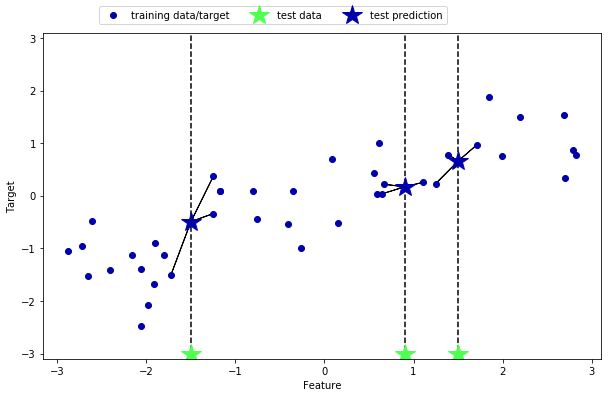

In [29]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [31]:
print("테스트 세트 예측\n {}".format(reg.predict(X_test)))

테스트 세트 예측
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [32]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


##### KNeighborsRegressor 분석

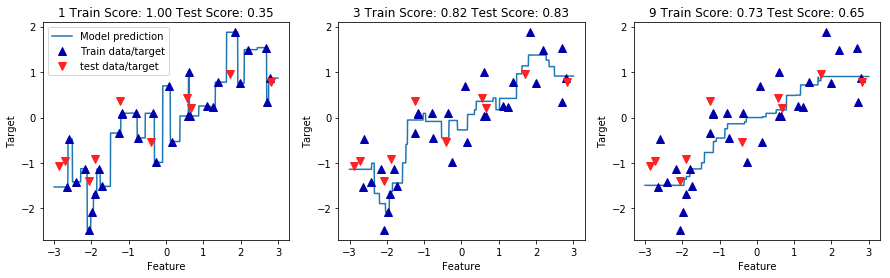

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
line = np.linspace(-3,3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} Train Score: {:.2f} Test Score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model prediction", "Train data/target", "test data/target"],loc="best")

* 분석 결과
  * 이웃을 하나만 사용할 때는 예측값이 훈련 데이터 모두를 지나가고, 여러개를 쓰면 쓸 수록 안정된 예측을 얻는다.

##### KNeighbors 분류기의 장단점과 매개변수
* 매개변수 : 거리를 재는 방법과 이웃의 수
  * 이웃의 수는 3개나 5개 정도로 잘 작동하나 잘 조정해야 함.
  * 거리재는 방법은 주로 유클리디안 거리 방식을 사용함.
* 장점
  * 매우 이해하기 쉬운 모델, 자주 좋은 성능 발휘
  * 훈련 세트가 매우 크면(특성의 수나 샘플의 수가 클 경우) 예측이 느려짐
  * 전처리하는 과정이 매우 중요
  * 수백 개 이상의 feature를 가진 데이터 셋에는 잘 작동하지 않음
  * 특성 값 대부분이 0인 데이터셋과는 잘 작동하지 않음
  * **현업에서는 잘 쓰지 않음??????**